<a href="https://colab.research.google.com/github/chungbinpark/ML-tutorial/blob/main/3_1_%EA%B3%BC%EC%A0%81%ED%95%A9_%EA%B2%80%EC%A6%9D%EC%85%8B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 과적합(overfit)


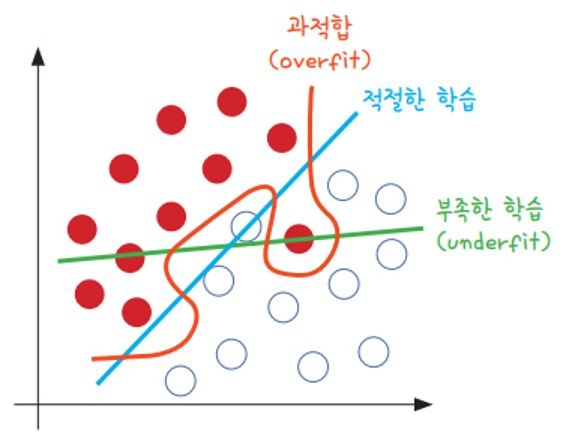

##  1. 데이터의 확인과 예측 실행

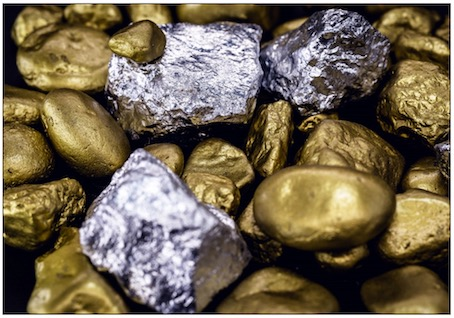

In [ ]:
import pandas as pd

# 깃허브에 준비된 데이터를 가져옵니다.
!git clone https://github.com/taehojo/data.git

# 광물 데이터를 불러옵니다.
df = pd.read_csv('./data/sonar3.csv', header=None)

# 첫 5줄을 봅니다.
df.head()

In [ ]:
df.tail(5)

In [ ]:
# 일반 암석(0)과 광석(1)이 몇 개 있는지 확인합니다.
df[60].value_counts()

In [ ]:
# 음파 관련 속성을 X로, 광물의 종류를 y로 저장합니다.
X = df.iloc[:,0:60]
y = df.iloc[:,60]

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 모델을 설정합니다.
model = Sequential()
model.add(Dense(24,  input_dim=60, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# 모델을 컴파일합니다.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델을 실행합니다.
history=model.fit(X, y, epochs=200, batch_size=10)

## 2. 학습셋과 테스트셋

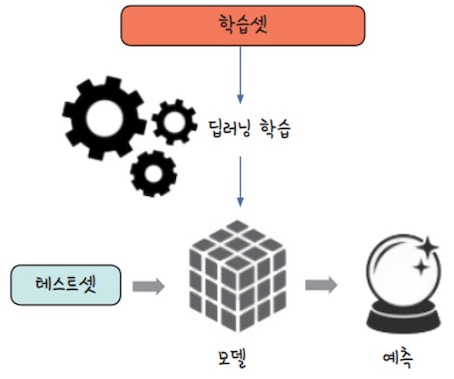

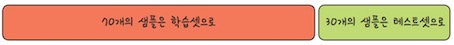

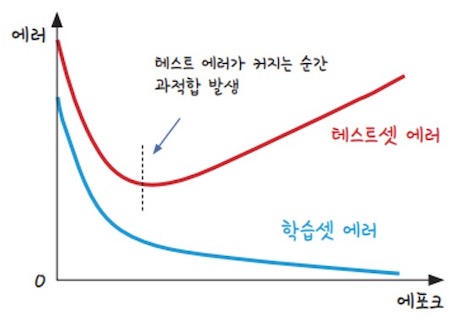

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split

import pandas as pd

In [ ]:
# 깃허브에 준비된 데이터를 가져옵니다. 앞에서 이미 데이터를 가져왔으므로 추석 처리합니다. 3번 예제만 별도 실행 시 주석을 해제하여 실습하세요.
# !git clone https://github.com/taehojo/data.git

In [ ]:
# 광물 데이터를 불러옵니다.
df = pd.read_csv('./data/sonar3.csv', header=None)

In [ ]:
# 음파 관련 속성을 X로, 광물의 종류를 y로 저장합니다.
X = df.iloc[:,0:60]
y = df.iloc[:,60]

In [ ]:
# 학습셋과 테스트셋을 구분합니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)

In [ ]:
# 모델을 설정합니다.
model = Sequential()
model.add(Dense(24,  input_dim=60, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# 모델을 컴파일합니다.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델을 실행합니다.
history=model.fit(X_train, y_train, epochs=200, batch_size=10)

In [ ]:
# 모델을 테스트셋에 적용해 정확도를 구합니다.
score=model.evaluate(X_test, y_test)
print('Test accuracy:', score[1])

## 3. 모델 저장과 재사용

In [ ]:
# 모델 이름과 저장할 위치를 함께 지정합니다.
model.save('./data/model/my_model.hdf5')

In [ ]:
from tensorflow.keras.models import Sequential, load_model

In [ ]:
# 모델을 새로 불러옵니다.
model1 = load_model('./data/model/my_model.hdf5')

# 불러온 모델을 테스트셋에 적용해 정확도를 구합니다.
score=model1.evaluate(X_test, y_test)
print('Test accuracy:', score[1])

## 5. k겹 교차 검증

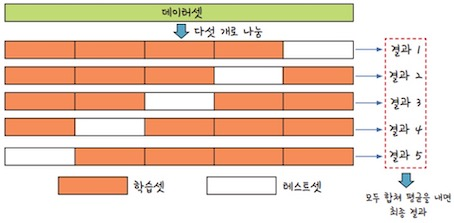

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

import pandas as pd

# 깃허브에 준비된 데이터를 가져옵니다. 앞에서 이미 데이터를 가져왔으므로 추석 처리합니다. 3번 예제만 별도 실행 시 주석을 해제하여 실습하세요.
# !git clone https://github.com/taehojo/data.git

# 광물 데이터를 불러옵니다.
df = pd.read_csv('./data/sonar3.csv', header=None)

# 음파 관련 속성을 X로, 광물의 종류를 y로 저장합니다.
X = df.iloc[:,0:60]
y = df.iloc[:,60]

In [ ]:
# 몇 겹으로 나눌 것인지를 정합니다.
k=5

# KFold 함수를 불러옵니다. 분할하기 전에 샘플이 치우치지 않도록 섞어 줍니다.
kfold = KFold(n_splits=k, shuffle=True)

# 정확도가 채워질 빈 리스트를 준비합니다.
acc_score = []

def model_fn():
    model = Sequential() # 딥러닝 모델의 구조를 시작합니다.
    model.add(Dense(24, input_dim=60, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    return model

# K겹 교차 검증을 이용해 k번의 학습을 실행합니다.
for train_index , test_index in kfold.split(X):  # for 문에 의해서 k번 반복합니다. spilt()에 의해 k개의 학습셋, 테스트셋으로 분리됩니다.
    X_train , X_test = X.iloc[train_index,:], X.iloc[test_index,:]
    y_train , y_test = y.iloc[train_index], y.iloc[test_index]

#    model = model_fn()
    model = Sequential() # 딥러닝 모델의 구조를 시작합니다.
    model.add(Dense(24, input_dim=60, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    history=model.fit(X_train, y_train, epochs=200, batch_size=10, verbose=0)

    accuracy = model.evaluate(X_test, y_test)[1]  # 정확도를 구합니다.
    acc_score.append(accuracy)  # 정확도 리스트에 저장합니다.

# k번 실시된 정확도의 평균을 구합니다.
avg_acc_score = sum(acc_score)/k

# 결과를 출력합니다.
print('정확도:', acc_score)
print('정확도 평균:', avg_acc_score)